In [1]:
import numpy as np
import os

np.random.seed(31)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#mpl.rc('axes', lablesize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# location to save figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "introduction"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format="png", dpi=300)

In [2]:
#ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
import os
datapath = os.path.join("dataset", "lifestat", "")

In [4]:
import numpy as np
import pandas as pd

oecd_bli = pd.read_csv(datapath + "oecd_bli_2017.csv", thousands=",")
#oecd_bli.head(5)
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(5)

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,1.1,80.0,13.20,72.0,63.6,1.0,33417.0,57462.0,20.0,...,52063.0,94.0,2.3,85.0,2.7,502.0,14.35,91.0,92.0,21.2
Austria,16.0,1.0,85.0,6.78,72.0,80.7,0.4,32544.0,59574.0,21.0,...,48295.0,92.0,1.6,70.0,1.3,492.0,14.55,75.0,93.0,17.1
Belgium,15.0,2.3,75.0,4.31,62.0,70.7,1.0,29968.0,104084.0,21.0,...,49587.0,92.0,2.2,75.0,2.2,503.0,15.77,89.0,84.0,18.2
Brazil,10.0,6.7,49.0,7.15,64.0,37.3,27.6,12227.0,7102.0,20.0,...,14024.0,90.0,0.8,70.0,2.2,395.0,14.45,79.0,72.0,15.9
Canada,7.0,0.2,91.0,3.73,73.0,80.9,1.4,29850.0,85758.0,22.0,...,48403.0,93.0,2.5,88.0,3.0,523.0,14.41,68.0,91.0,16.7


In [5]:
cols = oecd_bli.columns.tolist()
cols

['Air pollution',
 'Dwellings without basic facilities',
 'Educational attainment',
 'Employees working very long hours',
 'Employment rate',
 'Feeling safe walking alone at night',
 'Homicide rate',
 'Household net adjusted disposable income',
 'Household net financial wealth',
 'Housing expenditure',
 'Labour market insecurity',
 'Life expectancy',
 'Life satisfaction',
 'Long-term unemployment rate',
 'Personal earnings',
 'Quality of support network',
 'Rooms per person',
 'Self-reported health',
 'Stakeholder engagement for developing regulations',
 'Student skills',
 'Time devoted to leisure and personal care',
 'Voter turnout',
 'Water quality',
 'Years in education']

In [6]:
oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      7.0
Belgium      6.9
Brazil       6.6
Canada       7.3
Name: Life satisfaction, dtype: float64

In [7]:

gdp_data = pd.read_csv(datapath + "gdp_per_capita_2017.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
#gdp_data.head(5)
gdp_data.rename(columns={"2017": "GDP per capita"}, inplace=True)
gdp_data.set_index("Country", inplace=True)
gdp_data.head(5)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",521.314,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4505.817,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4204.953,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3238.477,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15220.633,2011.0


In [8]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_data, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
full_country_stats

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
South Africa,22.0,37.0,43.0,18.68,43.0,36.1,10.0,10872.0,17042.0,18.0,...,14.73,73.0,69.0,15.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4826.071,2014.0
Brazil,10.0,6.7,49.0,7.15,64.0,37.3,27.6,12227.0,7102.0,20.0,...,14.45,79.0,72.0,15.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",7495.070,2014.0
Russia,15.0,13.8,95.0,0.16,70.0,52.2,11.3,16657.0,2260.0,19.0,...,14.90,65.0,54.0,16.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8664.055,2015.0
Mexico,16.0,4.2,37.0,29.48,61.0,45.9,17.9,13891.0,4750.0,21.0,...,12.74,63.0,67.0,14.8,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8958.503,2015.0
Turkey,20.0,6.5,39.0,33.77,51.0,60.6,1.7,17067.0,4429.0,20.0,...,12.59,85.0,63.0,17.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9969.499,2013.0
Hungary,19.0,4.3,83.0,3.05,67.0,50.7,1.2,16821.0,23289.0,18.0,...,15.06,62.0,76.0,16.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.134,2015.0
Poland,22.0,2.7,91.0,6.68,65.0,66.3,0.8,18906.0,14997.0,23.0,...,14.42,55.0,80.0,17.7,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13037.963,2014.0
Chile,16.0,9.4,65.0,10.06,62.0,51.1,4.5,16588.0,21409.0,18.0,...,14.90,49.0,69.0,17.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13266.086,2014.0
Latvia,11.0,12.9,89.0,2.09,69.0,60.7,6.6,15269.0,17105.0,23.0,...,13.83,59.0,77.0,17.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15186.192,2015.0


In [9]:
#full_country_stats[["GDP per capita", 'Life satisfaction']]
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]

GDP per capita       58952.025
Life satisfaction        6.900
Name: United States, dtype: float64

In [10]:
full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[0]

GDP per capita       4826.071
Life satisfaction       4.800
Name: South Africa, dtype: float64

In [12]:
remove_indices = [0,1,6,8,34,35,36]
keep_indices = list(set(range(38)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
sample_data

,GDP per capita,Life satisfaction
Country,,
Russia,8664.055,6.0
Mexico,8958.503,6.6
Turkey,9969.499,5.5
Hungary,12239.134,5.3
Chile,13266.086,6.7
Slovak Republic,17439.162,6.1
Czech Republic,18104.593,6.6
Greece,18873.314,5.2
Estonia,19349.989,5.6


In [13]:
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]
missing_data

,GDP per capita,Life satisfaction
Country,,
South Africa,4826.071,4.8
Brazil,7495.070,6.6
Poland,13037.963,6.0
Latvia,15186.192,5.9
Iceland,60920.393,7.5
Norway,72046.291,7.5
Switzerland,79347.758,7.5


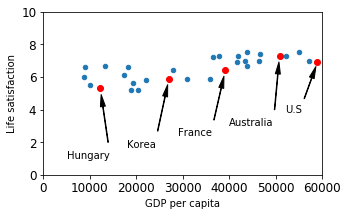

In [14]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}

for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S" if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
                arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

In [16]:
sample_data.to_csv(os.path.join("dataset", "lifestat", "lifestat.csv"))

In [17]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.134,5.3
Korea,27023.236,5.9
France,39126.348,6.4
Australia,50795.304,7.3
United States,58952.025,6.9


In [19]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(5.759813876792552, 2.17109017452261e-05)

saving figure best_fit_model_plot


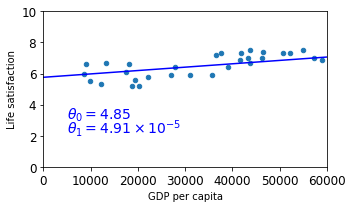

In [22]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X = np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
save_fig('best_fit_model_plot')
plt.show()